In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/'

In [3]:
import arviz as az
import matplotlib.pyplot as plt

### Load traces from MCMC

In [4]:
gender_cp = az.from_netcdf(file_path+'gender-models/gender_complete_pooling.nc')
gender_ml = az.from_netcdf(file_path+'gender-models/gender_multilevel.nc')
gender_np = az.from_netcdf(file_path+'gender-models/gender_no_pooling.nc')

In [5]:
ethnicity_cp = az.from_netcdf(file_path+'ethnicity-models/ethnicity_complete_pooling.nc')
ethnicity_ml = az.from_netcdf(file_path+'ethnicity-models/ethnicity_multilevel.nc')
ethnicity_np = az.from_netcdf(file_path+'ethnicity-models/ethnicity_no_pooling.nc')

In [6]:
adjusted_cp = az.from_netcdf(file_path+'adjusted_models/adjusted_complete_pooling.nc')
adjusted_ml = az.from_netcdf(file_path+'adjusted_models/adjusted_multilevel.nc')
adjusted_np = az.from_netcdf(file_path+'adjusted_models/adjusted_no_pooling.nc')

### Perform LOO across all models

In [7]:
compare_loo = az.compare({'Gender_Complete_Pooling': gender_cp,
            'Gender_No_Pooling': gender_np,
            'Gender_Multilevel': gender_ml,
            'Ethnicity_Complete_Pooling': ethnicity_cp,
            'Ethnicity_No_Pooling': ethnicity_np,
            'Ethnicity_Multilevel': ethnicity_ml,
            'Adjusted_Complete_Pooling': adjusted_cp,
            'Adjusted_No_Pooling': adjusted_np,
            'Adjusted_Multilevel': adjusted_ml
            });

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<ipython-input-8-ab3744c288cf>:2: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


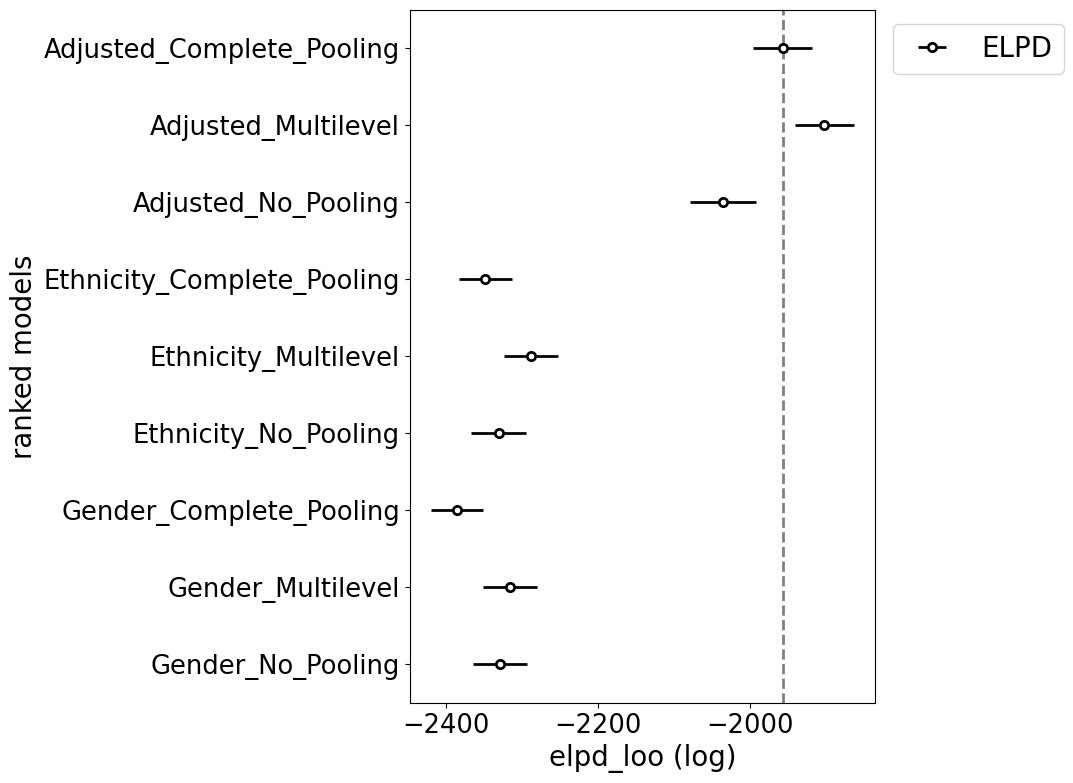

In [8]:
compare_plot = az.plot_compare(compare_loo.sort_index(), plot_ic_diff=False, order_by_rank=False, title=False)
plt.tight_layout()
plt.savefig(file_path + 'adjusted_models/model_loo.svg', bbox_inches='tight',  format='svg')  # bbox_inches='tight'を追加
plt.show()